In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as db
import plotly as ply
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('financial_data.csv')
df.head()

,Date,Revenue,Expenses,Profit
0,2023-07-23,6779,9187,-2408
1,2023-11-11,15221,7708,7513
2,2023-12-07,8686,8693,-7
3,2023-05-01,5711,4666,1045
4,2023-01-18,6852,9987,-3135


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Revenue   1000 non-null   int64 
 2   Expenses  1000 non-null   int64 
 3   Profit    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df[['Revenue', 'Expenses', 'Profit']].describe()

,Revenue,Expenses,Profit
count,1000.000000,1000.000000,1000.000000
mean,12311.360000,5979.476000,6331.884000
std,4362.996684,2342.899236,4969.539125
min,5023.000000,2004.000000,-4022.000000
25%,8472.750000,3868.750000,2584.000000
50%,12179.500000,5965.000000,6286.000000
75%,15959.750000,8188.500000,10029.750000
max,19989.000000,9999.000000,17869.000000


In [6]:
df['Month'] = df['Date'].dt.month

In [7]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()

In [8]:
monthly_profit = df.groupby('Month')['Profit'].sum()

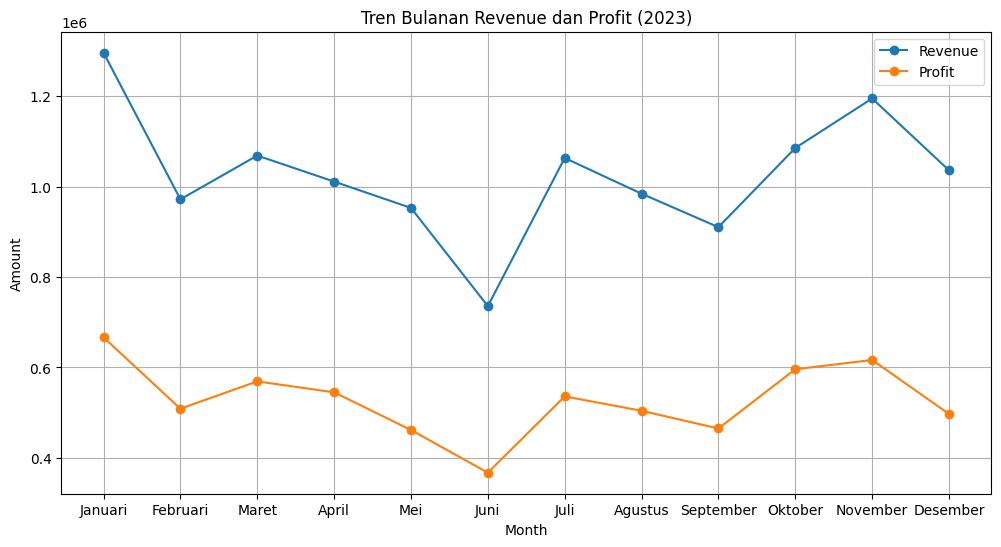

In [9]:
month_names = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue, label='Revenue', marker='o')
plt.plot(monthly_profit, label='Profit', marker='o')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Tren Bulanan Revenue dan Profit (2023)')
plt.xticks(ticks=range(1, 13), labels=month_names) 
plt.legend()
plt.grid()
plt.show()

In [10]:
monthly_expenses = df.groupby('Month')['Expenses'].sum()

In [11]:
monthly_profit_to_expenses_ratio = monthly_profit / monthly_expenses * 100

In [12]:
ratio_df = pd.DataFrame({
    'Month': month_names,
    'Profit to Expenses Ratio (%)': monthly_profit_to_expenses_ratio.map('{:.2f}%'.format)
})
ratio_df

,Month,Profit to Expenses Ratio (%)
Month,,
1,Januari,105.81%
2,Februari,109.80%
3,Maret,113.89%
4,April,116.87%
5,Mei,93.94%
6,Juni,99.55%
7,Juli,101.57%
8,Agustus,104.95%
9,September,104.35%


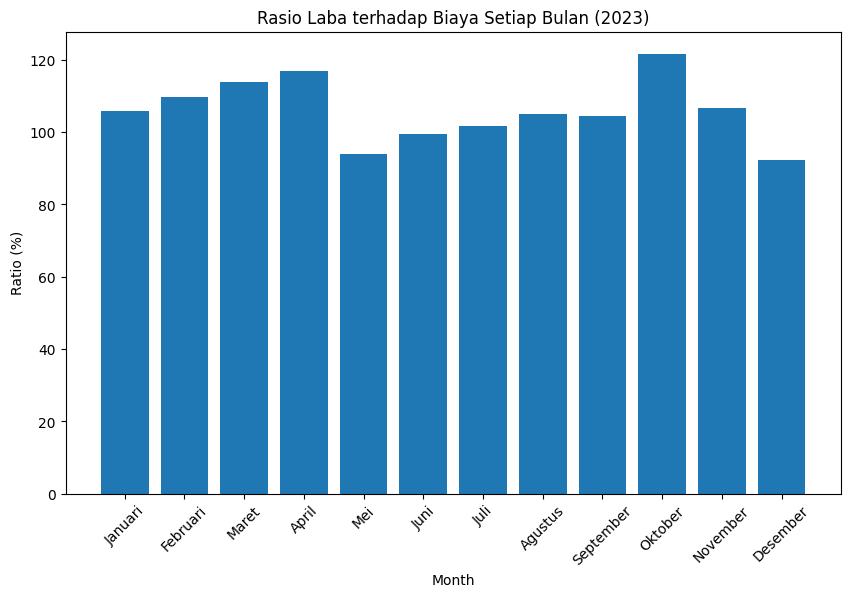

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_profit_to_expenses_ratio.index, monthly_profit_to_expenses_ratio.values)
plt.xlabel('Month')
plt.ylabel('Ratio (%)')
plt.title('Rasio Laba terhadap Biaya Setiap Bulan (2023)')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.show()

In [14]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=month_names,
    y=monthly_profit.values,
    name='Profit'
))

fig.update_layout(
    title='Laba Bulanan (2023)',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Profit'), 
    xaxis_tickangle=-45, 
)

fig.show()

### Memprediksi Pendapatan (Revenue) Berdasarkan Biaya (Expenses)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [16]:
x = df['Expenses'].values.reshape(-1, 1) # Variabel independen 
y = df['Revenue'] # Variabel dependen 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
# Evaluasi Model
print('R Square :', metrics.r2_score(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('MAPE :',  mean_absolut_percentage_error(y_test,y_pred))

R Square : -0.000372940090942242
MSE : 19043129.431964595
MAPE : 36.872883363541064


R-Square atau Koefisien Determinasi adalah ukuran statistik yang menunjukkan proporsi variansi dalam variabel dependen (target) yang dapat dijelaskan oleh variabel independen (fitur). Nilainya berkisar antara 0 hingga 1, dengan 1 menunjukkan bahwa model menjelaskan semua variansi dalam target.

MSE mengukur rata-rata kuadrat selisih antara nilai sebenarnya (observed) dan nilai yang diprediksi oleh model. Nilai yang lebih rendah menunjukkan model yang lebih baik, dengan 0 berarti tidak ada kesalahan antara prediksi dan nilai sebenarnya.

MAPE mengukur rata-rata persentase kesalahan absolut antara nilai sebenarnya dan nilai yang diprediksi. Nilai yang lebih rendah lebih baik, dengan 0 berarti tidak ada kesalahan.

Hasil evaluasi model menunjukkan bahwa model regresi linier memiliki kinerja yang buruk dalam memprediksi target. Dengan nilai R-Square sebesar -0.000372940090942242, model ini lebih buruk daripada model konstan, menunjukkan bahwa model gagal menangkap hubungan yang signifikan antara fitur dan target. Selain itu, nilai Mean Squared Error (MSE) yang tinggi, yaitu 19.043.129, mengindikasikan bahwa model memiliki kesalahan prediksi yang besar. Mean Absolute Percentage Error (MAPE) yang mencapai 36,87% berarti rata-rata kesalahan absolut prediksi adalah sekitar 36,87% dari nilai sebenarnya, yang menunjukkan tingkat kesalahan yang signifikan. Untuk meningkatkan performa model, perlu dilakukan eksplorasi lebih lanjut pada data dan fitur untuk memahami pola atau korelasi yang mungkin terlewatkan, serta mempertimbangkan penggunaan model lain atau teknik pra-pemrosesan yang lebih baik untuk memperbaiki akurasi prediksi.

In [22]:
#Prediksi
expenses_example = np.array([[3000]])  # Contoh biaya
predicted_revenue = model.predict(expenses_example)

print(f"Perkiraan pendapatan untuk biaya {expenses_example[0][0]}: {predicted_revenue[0]}")

Perkiraan pendapatan untuk biaya 3000: 12315.391544245324


In [23]:
correlation_matrix = df[['Revenue','Profit']].corr()
correlation_matrix

,Revenue,Profit
Revenue,1.000000,0.881901
Profit,0.881901,1.000000


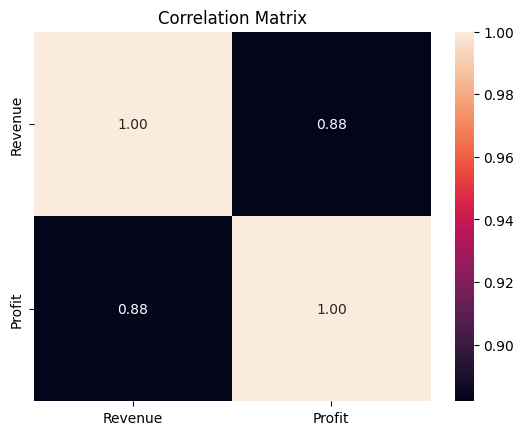

In [24]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Hasil matriks korelasi antara pendapatan (Revenue) dan laba (Profit) menunjukkan bahwa ada korelasi positif yang kuat antara kedua variabel ini, dengan koefisien korelasi sebesar 0.881901. Korelasi yang tinggi ini mengindikasikan bahwa ketika pendapatan meningkat, laba cenderung meningkat juga, dan sebaliknya.

### Analisis Outlier

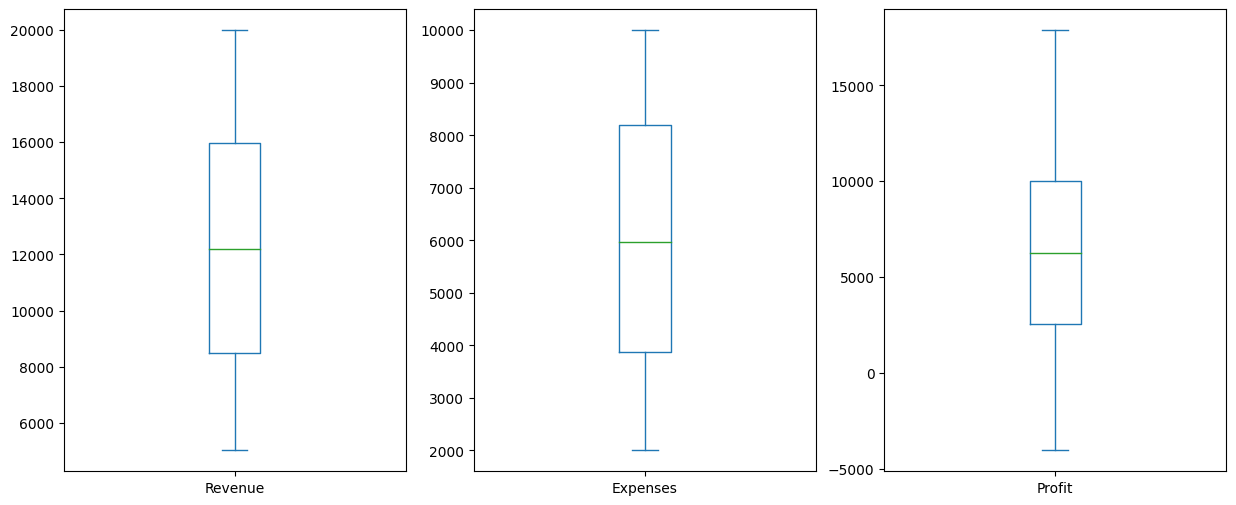

In [25]:
df[['Revenue', 'Expenses', 'Profit']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 6), sharey=False)
plt.show()

Berdasarkan hasil box plot untuk variabel Revenue (Pendapatan), Expenses (Biaya), dan Profit (Laba), terlihat bahwa tidak ada outlier pada ketiga variabel ini. Hal ini menunjukkan bahwa semua titik data berada dalam batas yang diharapkan berdasarkan Interquartile Range (IQR). Dengan tidak adanya outlier, kita dapat menyimpulkan bahwa distribusi data relatif stabil dan konsisten, tanpa adanya nilai-nilai yang menyimpang jauh dari rentang umum. Kondisi ini menunjukkan bahwa variasi dalam data berada dalam batas yang wajar, dan tidak ada titik data yang ekstrem yang mungkin disebabkan oleh kesalahan entri data atau faktor lain yang tidak normal.

### Proyeksi Kinerja Keuangan untuk Tahun Berikutnya Berdasarkan Tren Tahun 2023

AutoRegressive Integrated Moving Average (ARIMA) adalah salah satu algoritma yang paling umum digunakan untuk analisis deret waktu (time series). Model ini digunakan untuk memprediksi data masa depan berdasarkan pola data masa lalu. ARIMA sangat populer dalam analisis deret waktu karena kemampuannya untuk menangkap berbagai pola seperti tren, musiman, dan hubungan autokorelasi.

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
arima_order = (1, 1, 1)  # order (p, d, q) untuk ARIMA
arima_model = ARIMA(monthly_revenue, order=arima_order)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



p (AutoRegressive order): Merujuk pada jumlah lag yang digunakan dalam komponen autoregresi (AR). Misalnya, jika p = 1, model akan menggunakan satu nilai masa lalu (lag) untuk memprediksi nilai saat ini. Komponen AR menggambarkan hubungan antara nilai saat ini dan nilai sebelumnya (lag).

d (Integrated order):Menunjukkan jumlah perbedaan yang diperlukan untuk membuat data menjadi stasioner (stationary). Stasioner berarti data tidak memiliki tren yang jelas atau pola musiman yang kuat. Jika d = 1, model melakukan satu kali perbedaan (differencing) untuk menghilangkan tren atau pola musiman dari data.

q (Moving Average order): Mengacu pada jumlah lag dalam komponen rata-rata bergerak (MA). Misalnya, jika q = 1, model menggunakan satu error masa lalu untuk memperkirakan nilai saat ini. Komponen MA mencerminkan bagaimana kesalahan (error) masa lalu mempengaruhi nilai saat ini.

In [28]:
arima_result = arima_model.fit()

In [29]:
forecast_steps = 12  # Proyeksi 12 bulan ke depan
forecast_2024 = arima_result.forecast(steps=forecast_steps)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [30]:
monthly_revenue1 = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()

In [31]:
forecast_index = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='M')

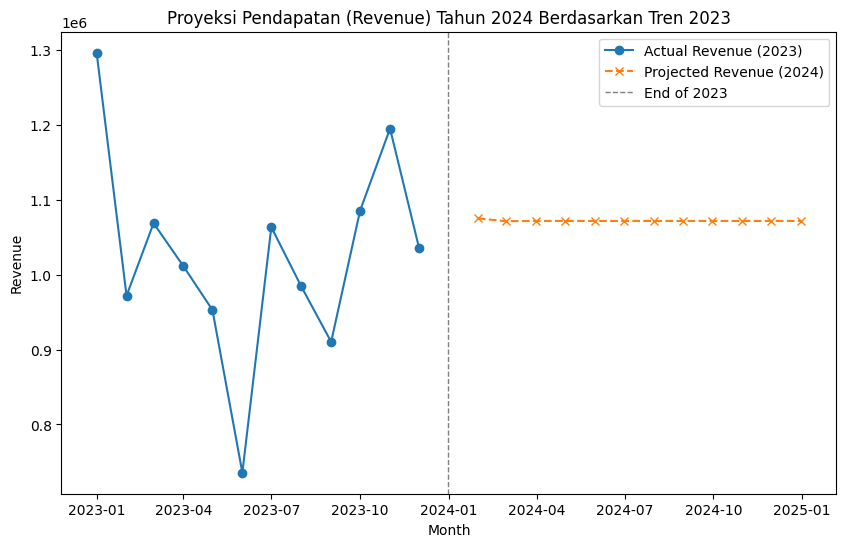

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue1.index.to_timestamp(), monthly_revenue1.values, label='Actual Revenue (2023)', marker='o')
plt.plot(forecast_index, forecast_2024, label='Projected Revenue (2024)', linestyle='--', marker='x')
plt.axvline(x=pd.Timestamp('2023-12-31'), color='gray', linestyle='--', linewidth=1, label='End of 2023')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Proyeksi Pendapatan (Revenue) Tahun 2024 Berdasarkan Tren 2023')
plt.legend()
plt.show()

Grafik proyeksi pendapatan (revenue) untuk tahun 2024 berdasarkan tren dari tahun 2023 menunjukkan perbedaan yang mencolok dalam pola antara kedua periode. Pada tahun 2023, data pendapatan mengalami fluktuasi yang cukup signifikan dari bulan ke bulan, mencerminkan variasi pendapatan yang mungkin disebabkan oleh faktor-faktor seperti penjualan musiman, perubahan permintaan, atau kejadian khusus. Namun, ketika melihat proyeksi untuk tahun 2024, tren cenderung stagnan. Meskipun proyeksi menunjukkan sedikit penurunan, garis pendapatan tetap relatif datar dibandingkan dengan 2023. Ini mengindikasikan bahwa berdasarkan tren yang dianalisis, pendapatan di tahun 2024 diperkirakan lebih stabil dan tidak banyak mengalami perubahan drastis. Dengan hasil ini, perusahaan dapat mengevaluasi strategi dan rencana mereka untuk memastikan proyeksi pendapatan yang lebih kuat, serta mempertimbangkan cara-cara untuk merangsang pertumbuhan agar menghindari stagnasi yang berkepanjangan di tahun mendatang.

### Margin Keuntungan (Profit Margin) pada Setiap Bulan

In [33]:
monthly_profit_margin = (monthly_profit / monthly_revenue) * 100
monthly_profit_margin.map('{:.2f}%'.format)

Month
1     51.41%
2     52.34%
3     53.25%
4     53.89%
5     48.44%
6     49.89%
7     50.39%
8     51.21%
9     51.06%
10    54.90%
11    51.59%
12    47.98%
dtype: object

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=month_names,  
    y=monthly_profit_margin.values,  
    mode='lines+markers',  
    name='Profit Margin',
    line=dict(color='blue', dash='solid'),  
    marker=dict(color='blue', symbol='circle')  
))

fig.update_layout(
    title='Margin Keuntungan Bulanan (2023)',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Profit Margin (%)'),
    xaxis_tickangle=-45,  
    showlegend=True  
)

fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

fig.show()